# Project: Investigate the TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

We will tentatively answer the following questions:
- Which genres are most popular from year to year?
- What kinds of properties are associated with movies that have high revenues?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The dataset look clean. The only cleaning steps needed are:

- Drop unnecessary columns.
- Drop duplicates if any.
- Drop some rows containing missing values.

### Drop unnecessary columns

In [4]:
df.drop(columns=['id','imdb_id','homepage','budget','revenue'],inplace=True)

### Drop duplicates if any

In [5]:
df.duplicated().sum()

1

There's indeed one duplicate.

In [6]:
# drop duplicates
df.drop_duplicates(inplace=True)

### Drop rows containing missing values. 

In [7]:
df.dropna(subset = ['genres'], inplace=True)

In [8]:
df.shape

(10842, 16)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genres are most popular?

In [9]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

We can see that each movie can be categorized into several genres, and we need to find what these genres are.

In [10]:
genres_combined = df['genres'].unique()
genres_set = set()
for genres in genres_combined:
#     print(genres.split(sep='|'))
    list = genres.split(sep='|')
    for g in list:
        genres_set.add(g)
genres_set

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

**One-hot encoding of genres**

We then add a few columns, whose names are the genres above, and in which 1 or 0 will denote whether the movie is fit into that genre.

In [11]:
genres_list = [l for l in genres_set]
genres_list

['Adventure',
 'Romance',
 'Animation',
 'Crime',
 'Family',
 'TV Movie',
 'Comedy',
 'Horror',
 'Western',
 'Fantasy',
 'Documentary',
 'Drama',
 'Thriller',
 'Mystery',
 'Music',
 'Foreign',
 'Science Fiction',
 'History',
 'Action',
 'War']

In [12]:
for genre in genres_list:
    df[genre] = df['genres'].str.contains(genre).apply(lambda x:1 if x else 0)

In [13]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'Adventure', 'Romance', 'Animation',
       'Crime', 'Family', 'TV Movie', 'Comedy', 'Horror', 'Western', 'Fantasy',
       'Documentary', 'Drama', 'Thriller', 'Mystery', 'Music', 'Foreign',
       'Science Fiction', 'History', 'Action', 'War'],
      dtype='object')

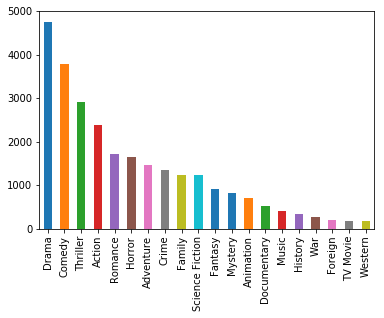

In [14]:
genres_counts = df.iloc[:,-20:].sum().sort_values(ascending = False)
genres_counts.plot.bar()

### Which genres are most popular from year to year?

In [15]:
df.groupby('release_year').size();

In [16]:
df_year = df.groupby('release_year').sum().iloc[:,-20:]

In [17]:
df_year['sum'] = df_year.sum(axis=1)

In [18]:
# print(df2.head())
df_year_prop = df_year.div(df_year['sum'], axis=0)
df_year_prop.head()


,Adventure,Romance,Animation,Crime,Family,TV Movie,Comedy,Horror,Western,Fantasy,...,Drama,Thriller,Mystery,Music,Foreign,Science Fiction,History,Action,War,sum
release_year,,,,,,,,,,,,,,,,,,,,,
1960,0.064103,0.076923,0.000000,0.025641,0.038462,0.0,0.102564,0.089744,0.076923,0.025641,...,0.166667,0.076923,0.000000,0.012821,0.012821,0.038462,0.064103,0.102564,0.025641,1.0
1961,0.080000,0.093333,0.013333,0.026667,0.066667,0.0,0.133333,0.040000,0.040000,0.026667,...,0.213333,0.000000,0.013333,0.026667,0.013333,0.053333,0.040000,0.093333,0.026667,1.0
1962,0.085366,0.060976,0.000000,0.036585,0.024390,0.0,0.060976,0.060976,0.036585,0.012195,...,0.256098,0.085366,0.048780,0.012195,0.012195,0.024390,0.048780,0.097561,0.036585,1.0
1963,0.076923,0.087912,0.010989,0.043956,0.032967,0.0,0.142857,0.098901,0.021978,0.021978,...,0.142857,0.109890,0.065934,0.000000,0.021978,0.021978,0.043956,0.043956,0.010989,1.0
1964,0.045045,0.081081,0.018018,0.090090,0.036036,0.0,0.144144,0.054054,0.009009,0.036036,...,0.180180,0.081081,0.036036,0.045045,0.009009,0.036036,0.027027,0.045045,0.027027,1.0


In [19]:
df_year_prop.iloc[:,:-1].idxmax(axis=1)

release_year
1960     Drama
1961     Drama
1962     Drama
1963    Comedy
1964     Drama
1965     Drama
1966    Comedy
1967    Comedy
1968     Drama
1969     Drama
1970     Drama
1971     Drama
1972     Drama
1973     Drama
1974     Drama
1975     Drama
1976     Drama
1977     Drama
1978     Drama
1979     Drama
1980     Drama
1981     Drama
1982     Drama
1983     Drama
1984     Drama
1985    Comedy
1986     Drama
1987    Comedy
1988    Comedy
1989    Comedy
1990     Drama
1991     Drama
1992     Drama
1993     Drama
1994    Comedy
1995     Drama
1996     Drama
1997     Drama
1998     Drama
1999     Drama
2000     Drama
2001    Comedy
2002     Drama
2003    Comedy
2004     Drama
2005     Drama
2006     Drama
2007     Drama
2008     Drama
2009     Drama
2010     Drama
2011     Drama
2012     Drama
2013     Drama
2014     Drama
2015     Drama
dtype: object

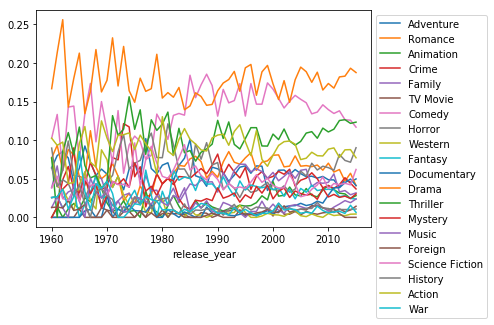

In [20]:
ax = df_year_prop.reset_index().plot(x='release_year', y = genres_list,  kind='line')
ax.legend(loc = 'best',bbox_to_anchor=(1.0, 1.0))

In [21]:
df_ma = df_year_prop.copy(deep=True)
for genres in genres_list:
    df_ma[genres] = df_year_prop[genres].rolling(10).mean()

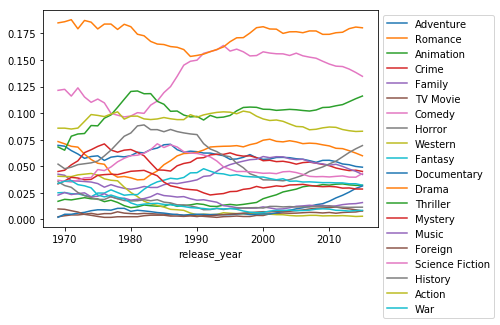

In [22]:
ax = df_ma.reset_index().plot(x='release_year', y = genres_list,  kind='line')
ax.legend(loc = 'best',bbox_to_anchor=(1.0, 1.0))

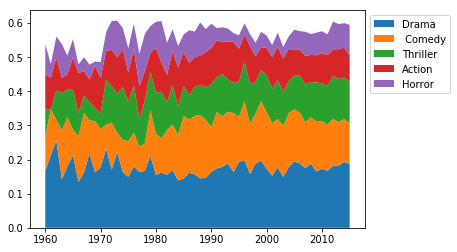

In [23]:
df_year_prop = df_year_prop.reset_index()
plt.stackplot(df_year_prop['release_year'],df_year_prop['Drama'],df_year_prop['Comedy'], df_year_prop['Thriller'], df_year_prop['Action'], df_year_prop['Horror'], labels = ['Drama',' Comedy','Thriller','Action','Horror'])
plt.legend(loc='upper left',bbox_to_anchor=(1.0, 1.0))

### What kinds of properties are associated with movies that have high revenues?

In [24]:
df.head()

,popularity,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,...,Documentary,Drama,Thriller,Mystery,Music,Foreign,Science Fiction,History,Action,War
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,...,0,0,1,0,0,0,1,0,1,0
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,...,0,0,1,0,0,0,1,0,1,0
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,...,0,0,1,0,0,0,1,0,0,0
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,...,0,0,0,0,0,0,1,0,1,0
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,...,0,0,1,0,0,0,0,0,1,0


In [31]:
df_num = df[['popularity','runtime','vote_count', 'vote_average','budget_adj', 'revenue_adj']]

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


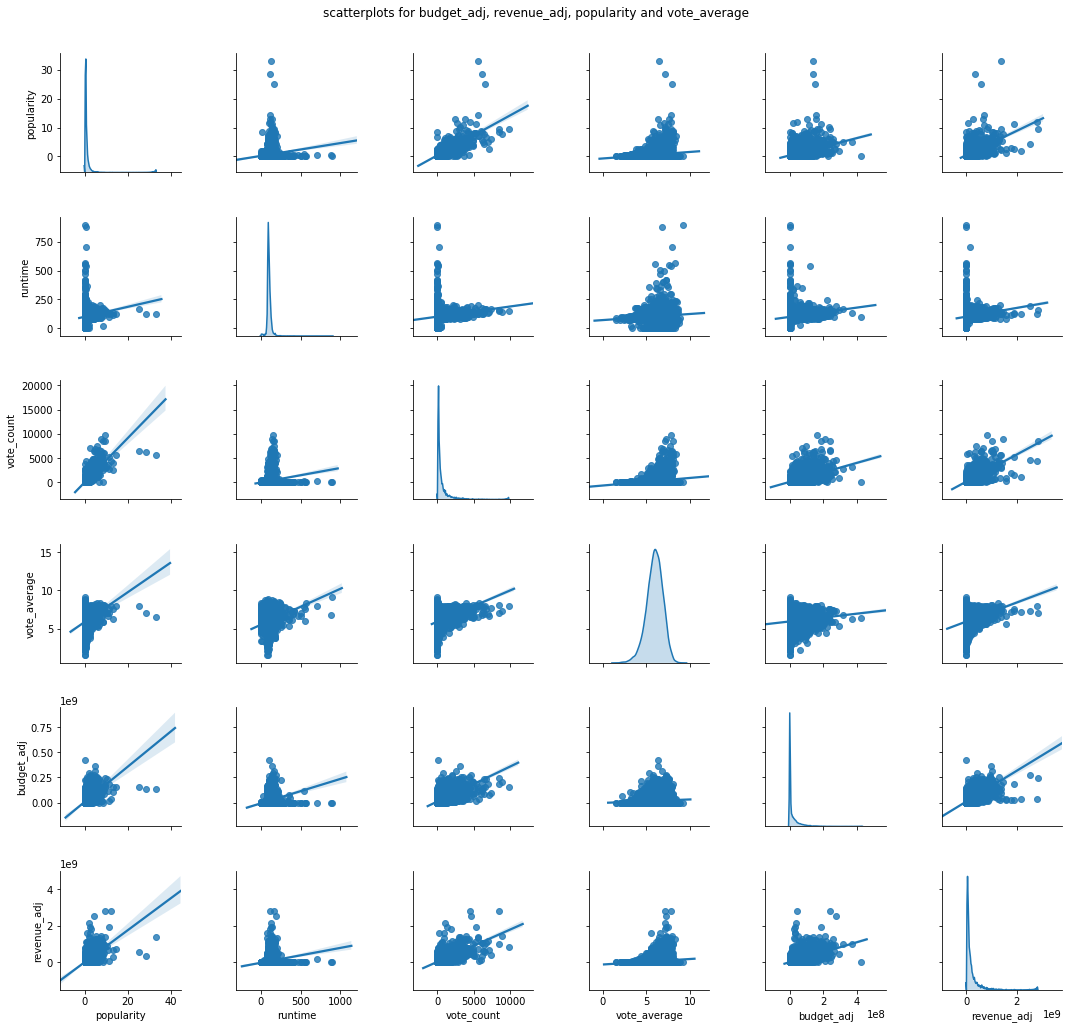

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
f1 = sns.pairplot(df_num, kind="reg", diag_kind="kde", diag_kws=dict(shade=True))
f1.fig.suptitle('scatterplots for budget_adj, revenue_adj, popularity and vote_average\n')
f1.fig.tight_layout(rect=[0, 0.03, 1, 0.95])

# plt.matshow(df_num.corr())

In [26]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [30]:
df.columns

Index(['popularity', 'original_title', 'cast', 'director', 'tagline',
       'keywords', 'overview', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj', 'Adventure', 'Romance', 'Animation',
       'Crime', 'Family', 'TV Movie', 'Comedy', 'Horror', 'Western', 'Fantasy',
       'Documentary', 'Drama', 'Thriller', 'Mystery', 'Music', 'Foreign',
       'Science Fiction', 'History', 'Action', 'War'],
      dtype='object')

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!